In [1]:
import pandas as pd
from collections import Counter

<h2>1. Exploratory Data Analysis</h2>
<ol>
    <li>
        <h3>Analyse de la forme:</h3>
        <ul>
            <li><p><b>Variable target</b>: FRAUD</p></li>
            <li><p><b>Lignes et colonnes</b>: 1644891 ligne , 15 colonnes</p></li>
            <li><p><b>Lignes Type de variables</b>: 9 de type numrique, 4 de type quantatif, 1 date(Chargind_Tm), 1 boolean (target),</p></li>
            <li><p><b>Analyse des valeurs manquantes</b>: <br>
            <ul>
                <li><b>cell_id</b>: contien 21270 (1.29%) valuer manquant (dont 13900 (65.4%) Fraud and 7370 (34.6) Non fraud)</li>
                <li><b>MU_HANDSET_DUAL_SIM</b>: contien 12672 (0.77%) valeur manquant (dont 9433 (74.4%) Fraud and 3239 (25.6%) Non fraud)</li>
                <li><b>MU_HANDSET_MOBILE_TECH</b>: contien 12672 (0.77%) valeur manquant (dont 9433 (74.4%) Fraud and 3239 (25.6%) Non fraud)</li>
                <li><b>IMEI</b>: contien 5438 (0.33%) valeur manquant (dont 3826 (70.4) Fraud and 1612 (29.6) Non fraud)</li>
                <li><b>TAC</b>: contien 5438 (0.33%) valeur manquant (dont 3826 (70.4) Fraud and 1612 (29.6) Non fraud)</li>
            </ul>
            </p></li>
        </ul>
    </li>
    <li>
        <h3>Analyse du fond:</h3>
        <ul>
            <li><p><b>Visualisation de la target</b>: </p></li>
            <li><p><b>Signification des variables</b>: </p></li>
            <li><p><b>Relation Variables/Target</b>: </p></li>
        </ul>
    </li>
</ol>

In [2]:
# Reading the CSV file containing fraudulent data and storing it in the variable 'fraud'
fraud = pd.read_csv('datasets/PFE_DATASET_FRAUD.csv', delimiter=";")
# Reading the CSV file containing non-fraudulent data and storing it in the variable 'not_fraud'
not_fraud = pd.read_csv('datasets/PFE_DATASET_NOT_FRAUD.csv', delimiter=";")

# Adding a new column 'is_fraud' to the 'fraud' DataFrame and assigning all values as 1
fraud["is_fraud"] = 1
# Adding a new column 'is_fraud' to the 'not_fraud' DataFrame and assigning all values as 0
not_fraud["is_fraud"] = 0

# Concatenating the 'fraud' and 'not_fraud' DataFrames along rows to create a single DataFrame 'df'
df = pd.concat([fraud, not_fraud])

# Converting the 'Charging_Tm' column to datetime format in the 'df' DataFrame
df['Charging_Tm'] = pd.to_datetime(df['Charging_Tm'])

<h3>Analyse de la forme:</h3>

In [3]:
# Filtering the DataFrame 'df' to select rows where the 'Charging_Tm' column is greater than April 22, 2024, and less than April 25, 2024
df = df[(df["Charging_Tm"] > pd.to_datetime("22/04/2024")) & (df["Charging_Tm"] < pd.to_datetime("25/04/2024"))]

# Grouping the DataFrame 'df' by the column 'A_Num', and then checking if any transaction within each group is flagged as fraud
Counter(df.groupby("A_Num")["is_fraud"].any().astype(int).reset_index()["is_fraud"])

C:\Users\tr3h2\AppData\Local\Temp\ipykernel_1660\572669630.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = df[(df["Charging_Tm"] > pd.to_datetime("22/04/2024")) & (df["Charging_Tm"] < pd.to_datetime("25/04/2024"))]


Counter({0: 14634, 1: 660})

In [4]:
# Getting the dimensions (number of rows and columns) of the DataFrame 'df'
df.shape

(475014, 15)

In [5]:
# Counting the number of columns with each data type in the DataFrame 'df'
df.dtypes.value_counts()

int64             6
float64           4
object            4
datetime64[ns]    1
Name: count, dtype: int64

In [6]:
# Calculating the sum of null values in each column of the DataFrame 'df' and concatenating it with the percentage of null values
null_data = pd.concat([df.isna().sum(), (df.isna().sum()/df.shape[0])*100],  axis=1)

# Assigning column names to the resulting DataFrame
null_data.columns = ['Null Count', 'Null Percentage']

# Formatting the 'Null Percentage' column to round off to 2 decimal places and append '%' symbol
null_data['Null Percentage'] = (null_data['Null Percentage'].round(2)).astype(str) + '%'

# Filtering out rows where the 'Null Count' is greater than 0
null_data = null_data[null_data["Null Count"]>0]

# Sorting the DataFrame based on the 'Null Percentage' column in descending order
null_data = null_data.sort_values(by='Null Percentage', ascending=False)

null_data 

,Null Count,Null Percentage
cell_id,4237,0.89%
MU_HANDSET_DUAL_SIM,2772,0.58%
MU_HANDSET_MOBILE_TECH,2772,0.58%
IMEI,907,0.19%
TAC,907,0.19%


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

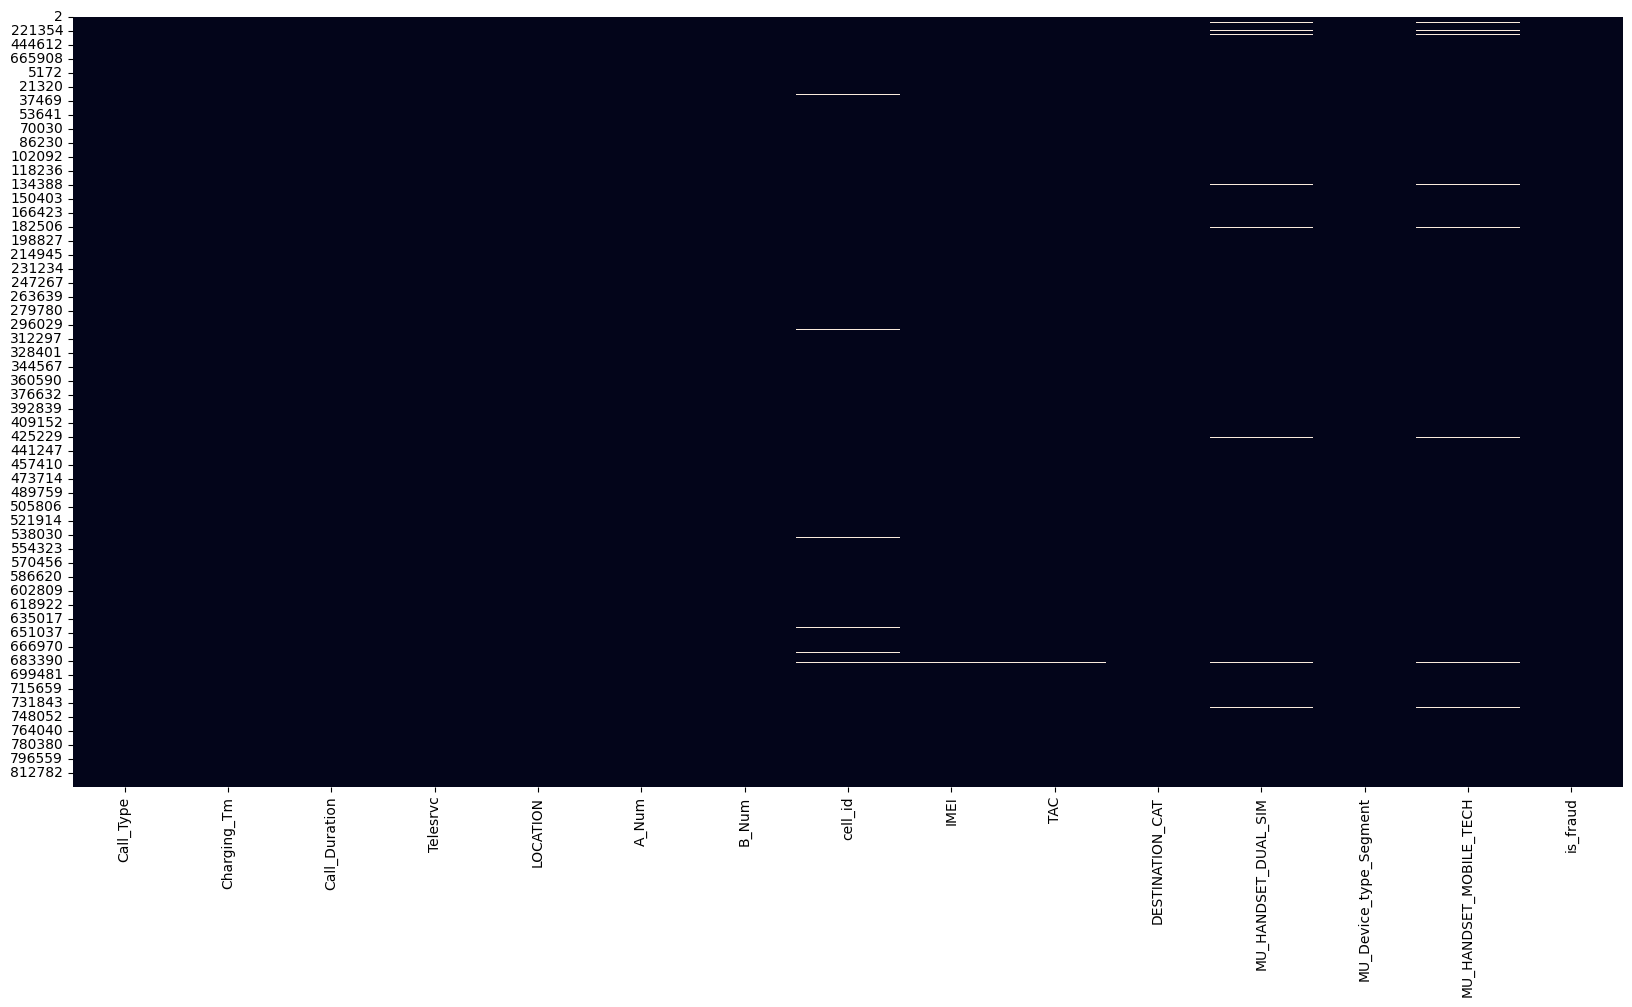

In [8]:
# Creating a heatmap to visualize the presence of null values in the DataFrame 'df'
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
from collections import Counter

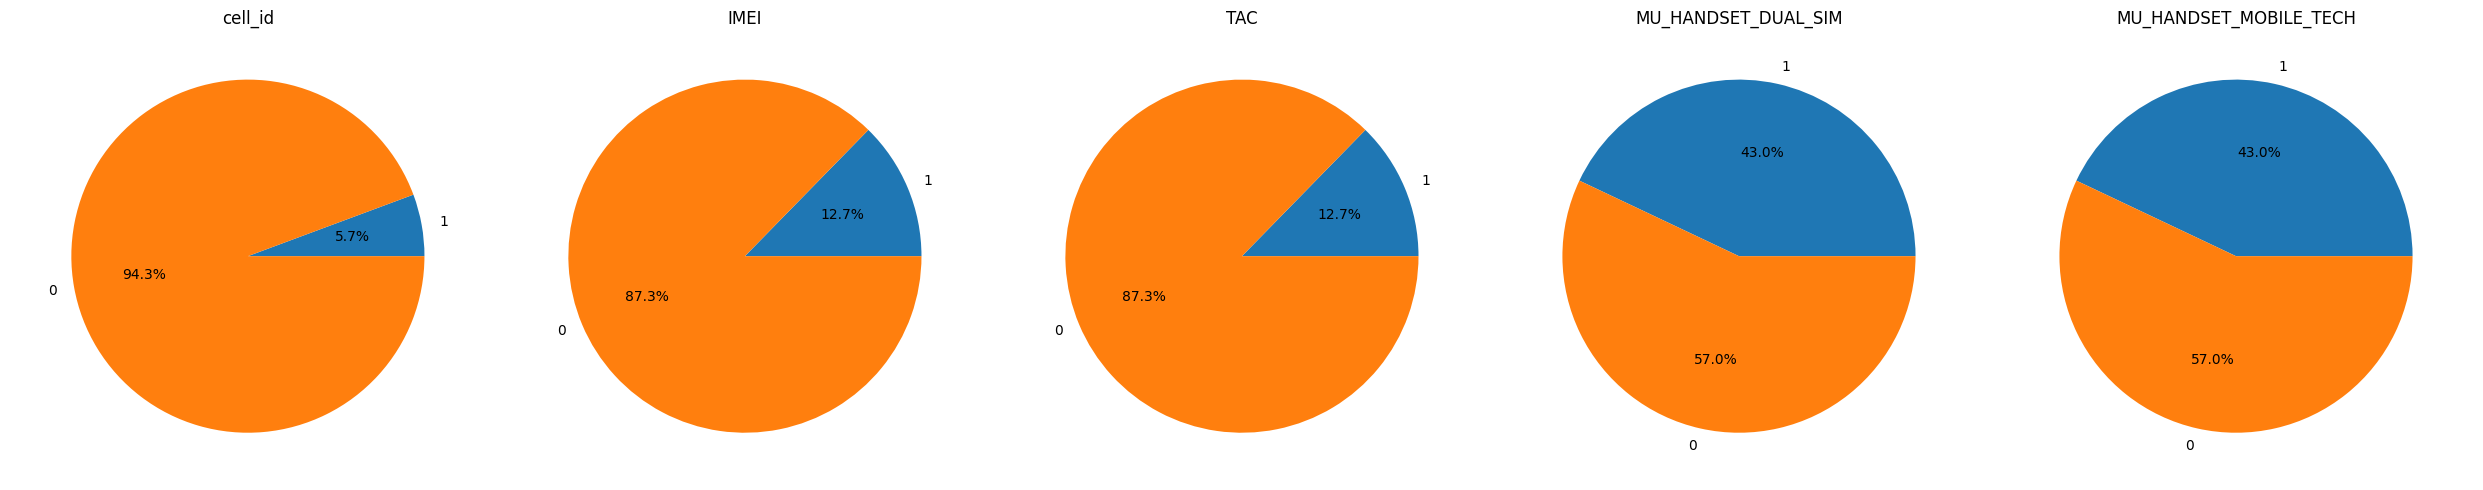

In [10]:
# Extracting column names with at least one NaN (null) value
nan_cols = df.columns[df.isna().any()]

# Creating subplots based on the number of columns with NaN values
fig, axes = plt.subplots(1, len(nan_cols), figsize=(5*len(nan_cols), 5))

# Iterating over columns with NaN values
for i, col in enumerate(nan_cols):
    # Counting the occurrence of 'is_fraud' values where the corresponding column has NaN values
    data = Counter(df[df[col].isnull()]["is_fraud"])
    labels = data.keys()
    sizes = data.values()

    # Creating a pie chart for each column to visualize the distribution of 'is_fraud' for NaN values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i].axis('equal')
    axes[i].set_title(col) 

plt.tight_layout()
plt.show()


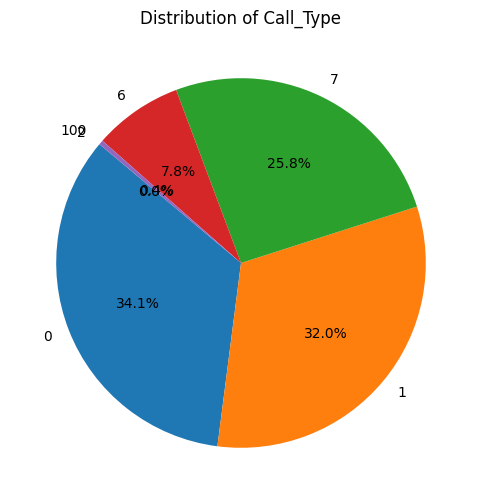

Call_Type-----------------------------------------[  6   0   1   7 100   2]


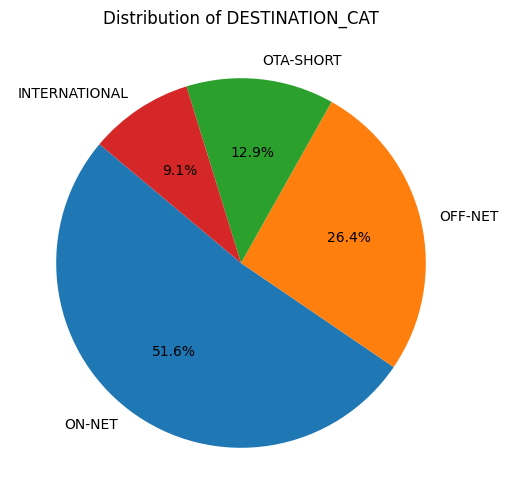

DESTINATION_CAT-----------------------------------['ON-NET' 'OFF-NET' 'INTERNATIONAL' 'OTA-SHORT']


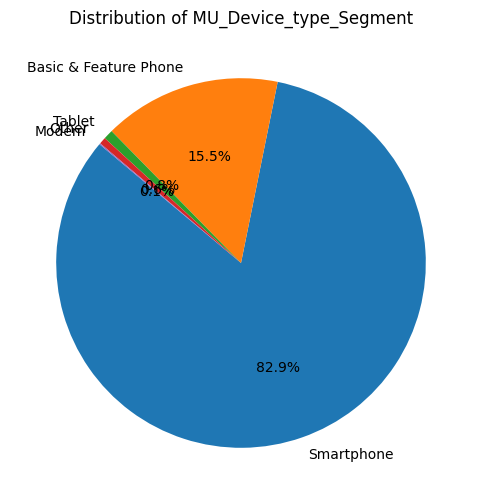

MU_Device_type_Segment----------------------------['Smartphone' 'Basic & Feature Phone' 'Modem' 'Other' 'Tablet']


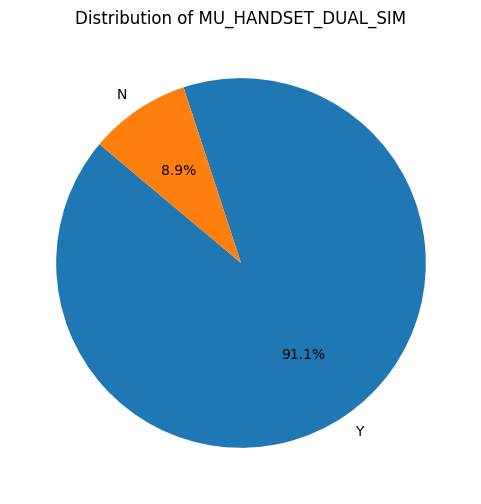

MU_HANDSET_DUAL_SIM-------------------------------['Y' 'N' nan]


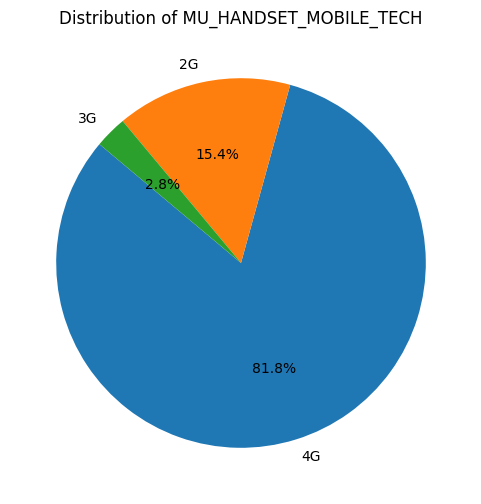

MU_HANDSET_MOBILE_TECH----------------------------['4G' '2G' '3G' nan]


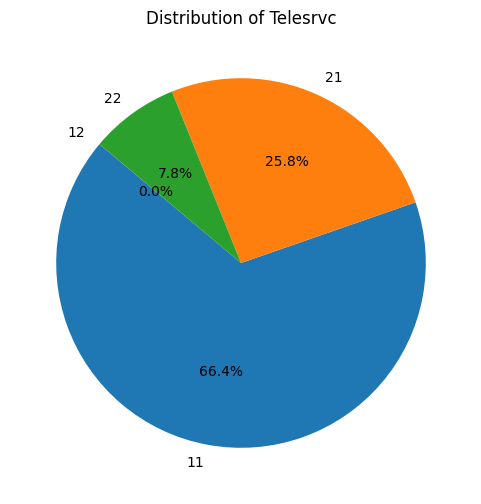

Telesrvc------------------------------------------[22 11 21 12]


In [11]:
# Selecting columns with less than 10 unique values and excluding the 'is_fraud' column
categorical_columns = df.columns[df.nunique() < 10].difference(['is_fraud'])

# Iterating over each categorical column
for col in categorical_columns:
    # Extracting unique values in the column
    unique_values = df[col].unique()

    # Counting the occurrence of each unique value in the column
    value_counts = df[col].value_counts()

    # Creating a new figure for each categorical column
    plt.figure(figsize=(6, 6))

    # Creating a pie chart to visualize the distribution of unique values
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

    # Setting title for the pie chart
    plt.title(f'Distribution of {col}')

    # Displaying the pie chart
    plt.show()

    # Printing the column name and its unique values
    print(f'{col :-<50}{unique_values}')


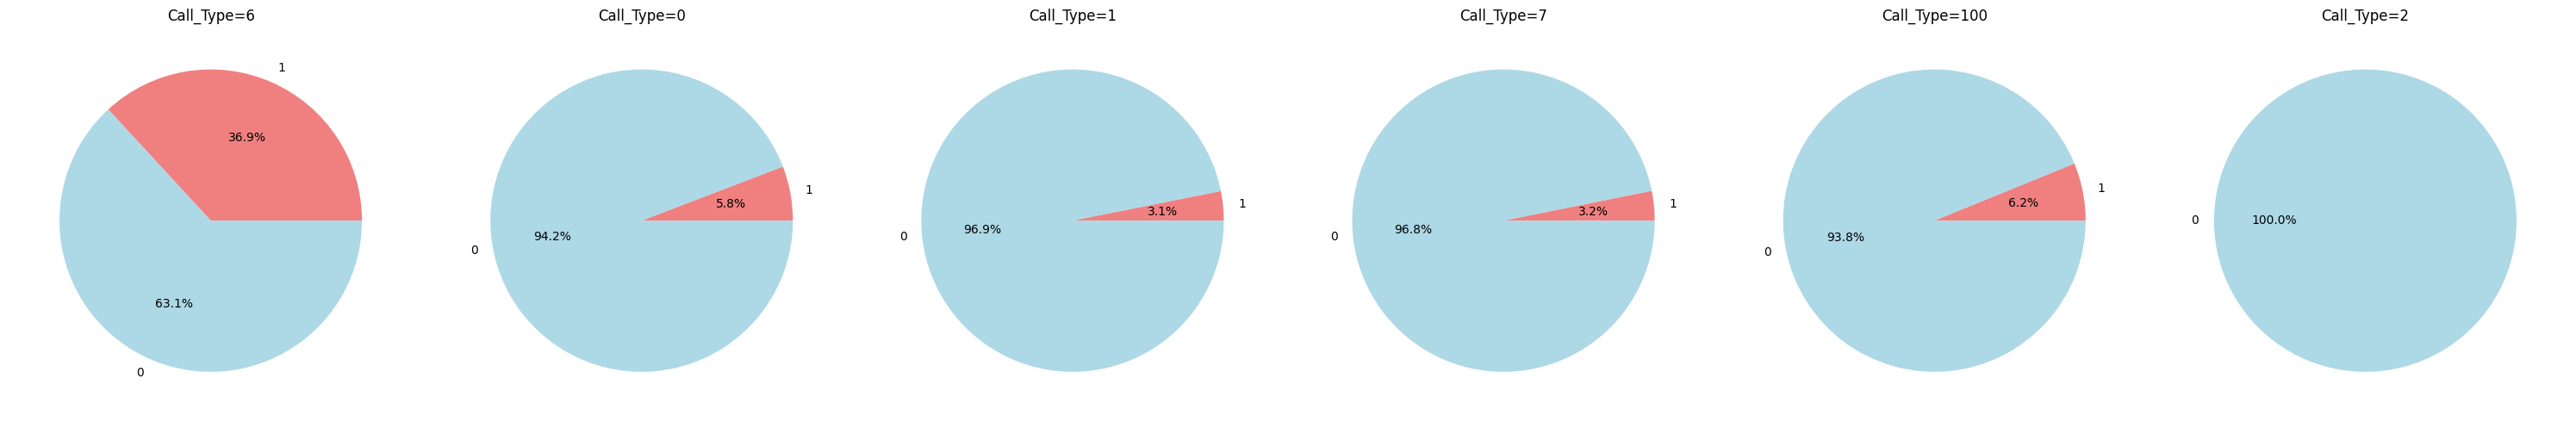

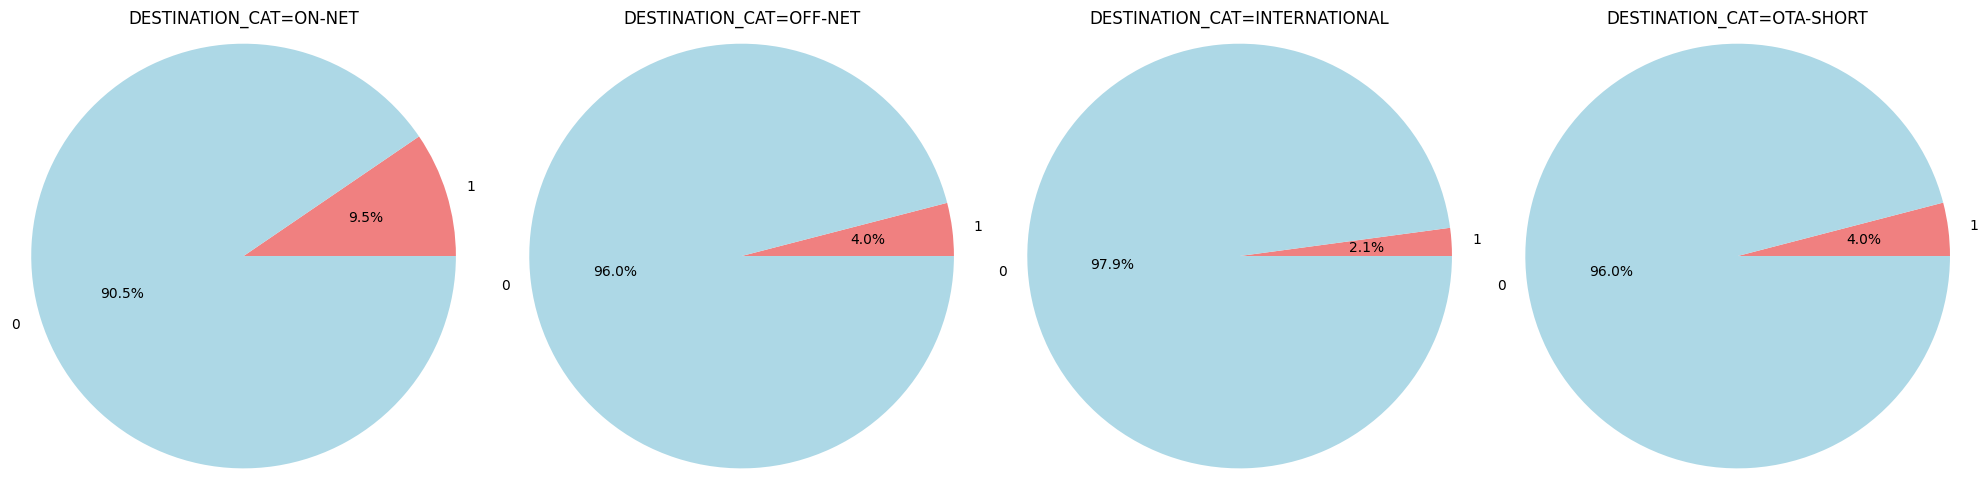

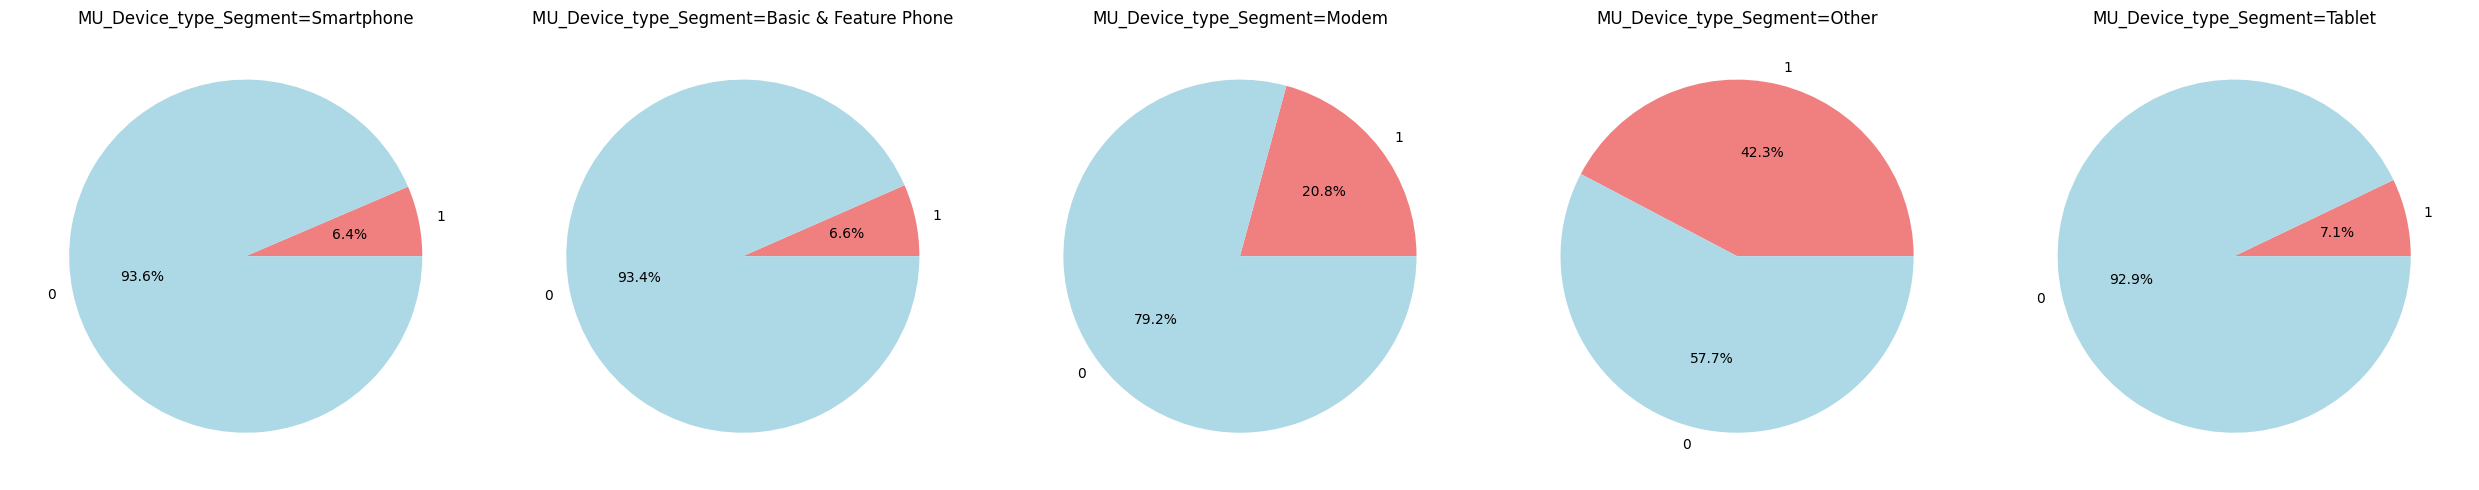

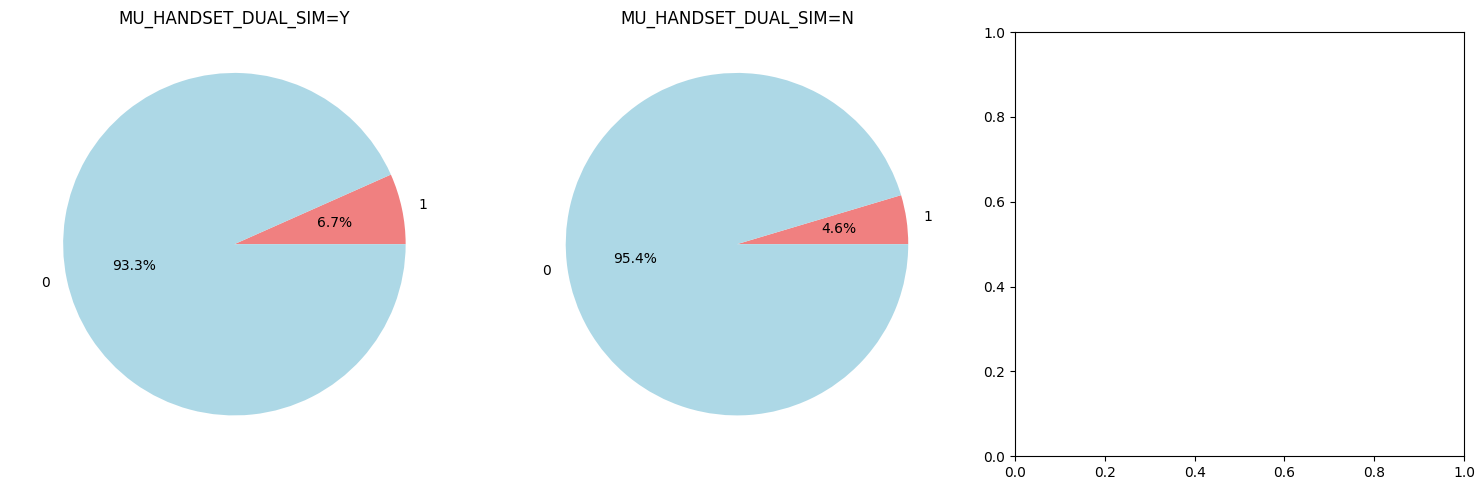

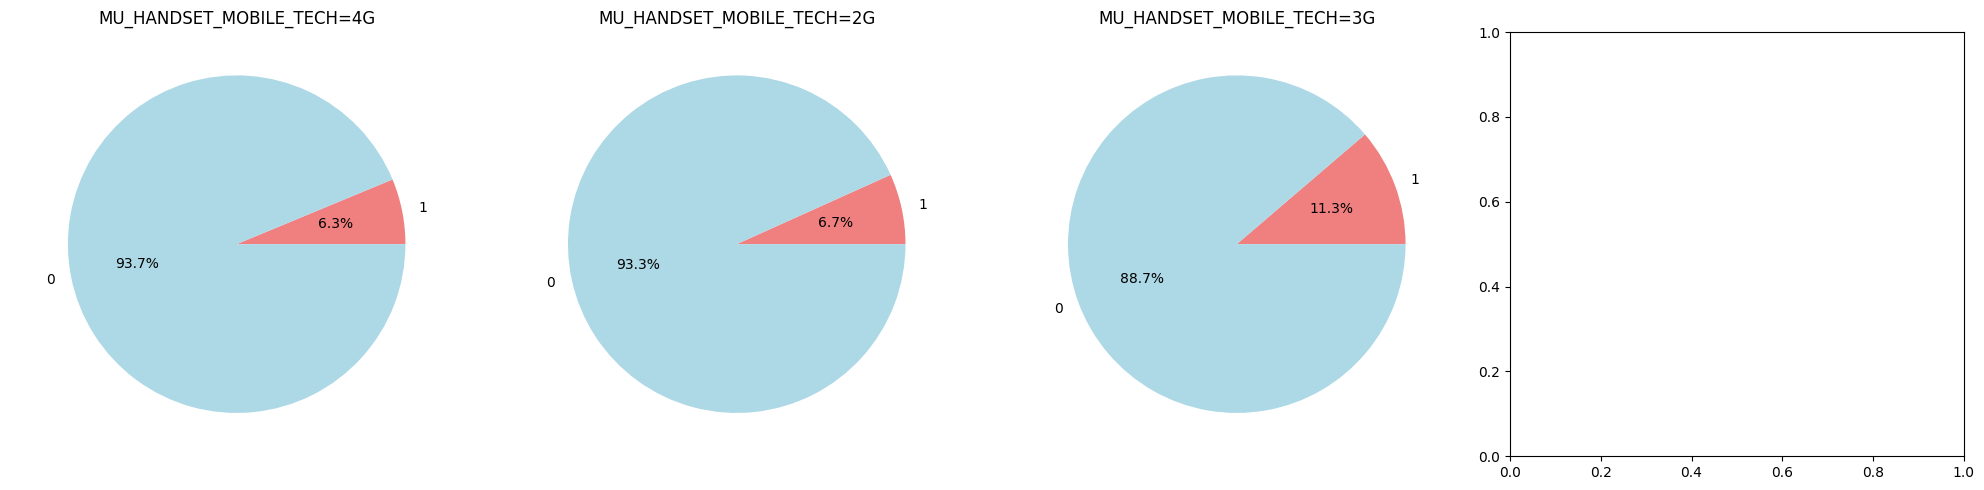

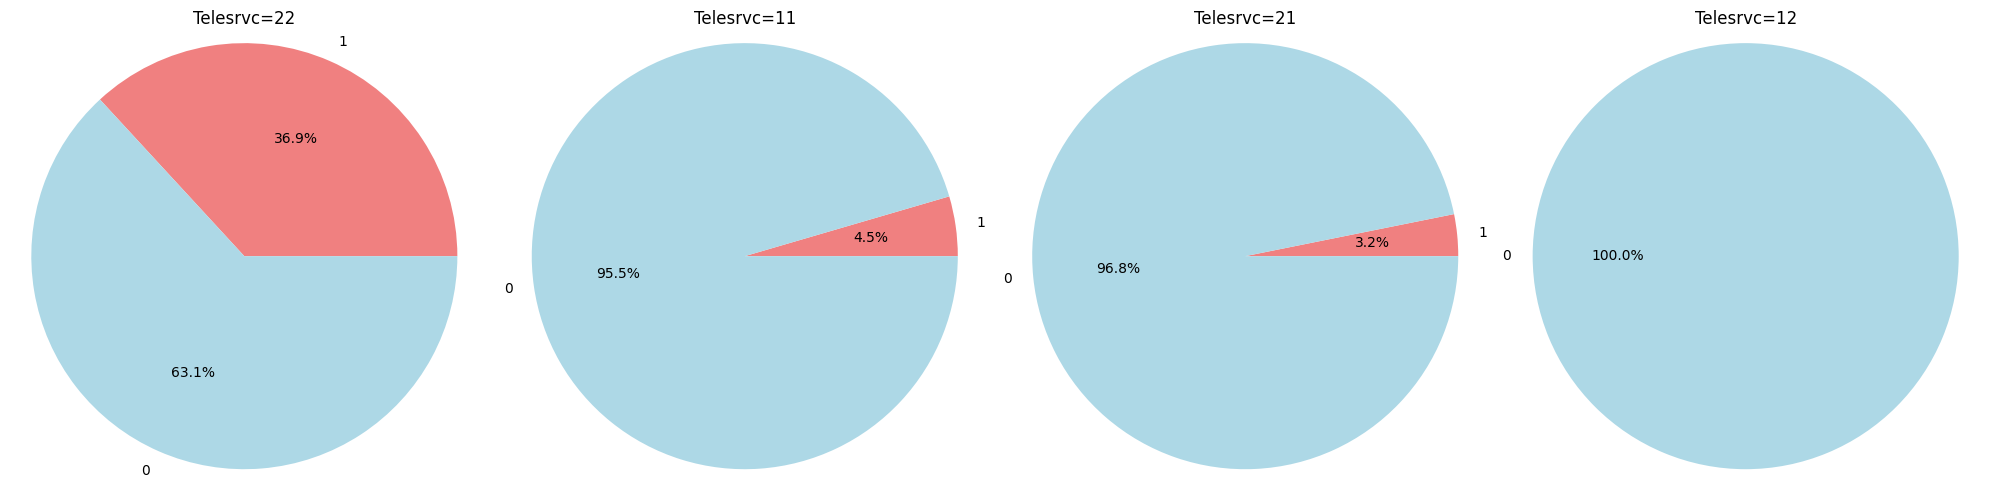

In [12]:
# Defining colors for True and False values
colors = {True: 'lightcoral', False: 'lightblue'}

# Iterating over each categorical column
for col in categorical_columns:
    # Extracting unique values in the column
    unique_values = df[col].unique()

    # Creating subplots based on the number of unique values in the column
    fig, axes = plt.subplots(1, len(unique_values), figsize=(5*len(unique_values), 5))

    # Iterating over each unique value in the column
    for i, value in enumerate(unique_values):
        # Skip if the value is NaN
        if pd.isnull(value):
            continue

        # Counting the occurrence of 'is_fraud' values where the column equals the current unique value
        data = Counter(df[df[col]==value]['is_fraud'])
        labels = data.keys()
        sizes = data.values()

        # Selecting colors based on the 'is_fraud' values
        pie_colors = [colors[label] if label in colors else 'grey' for label in labels]

        # Creating a pie chart for each unique value to visualize the distribution of 'is_fraud'
        axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', colors=pie_colors)
        axes[i].axis('equal')
        axes[i].set_title(f"{col}={value}")
    plt.tight_layout()
    plt.show()


In [13]:
# Creating a DataFrame containing only the rows where 'is_fraud' column is equal to 1 (fraudulent transactions)
fraud_df = df[df['is_fraud']==1]

# Creating a DataFrame containing only the rows where 'is_fraud' column is equal to 0 (non-fraudulent transactions)
not_fraud_df = df[df['is_fraud']==0]

In [14]:
df.columns

Index(['Call_Type', 'Charging_Tm', 'Call_Duration', 'Telesrvc', 'LOCATION',
       'A_Num', 'B_Num', 'cell_id', 'IMEI', 'TAC', 'DESTINATION_CAT',
       'MU_HANDSET_DUAL_SIM', 'MU_Device_type_Segment',
       'MU_HANDSET_MOBILE_TECH', 'is_fraud'],
      dtype='object')

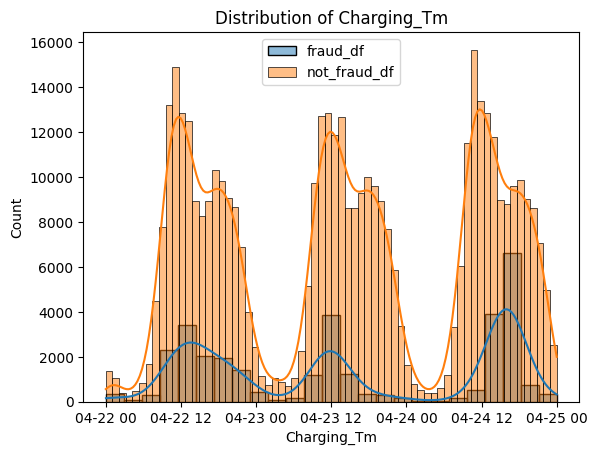

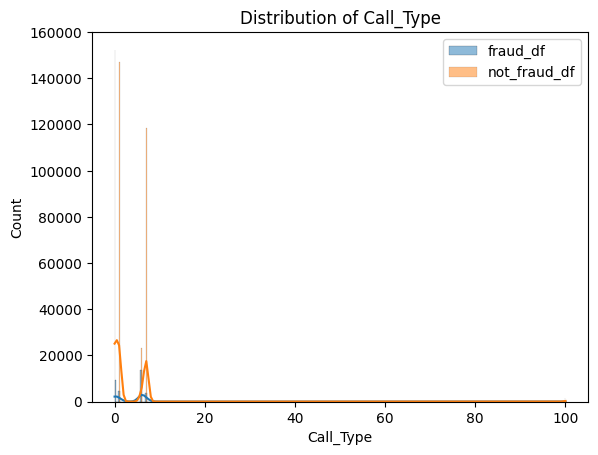

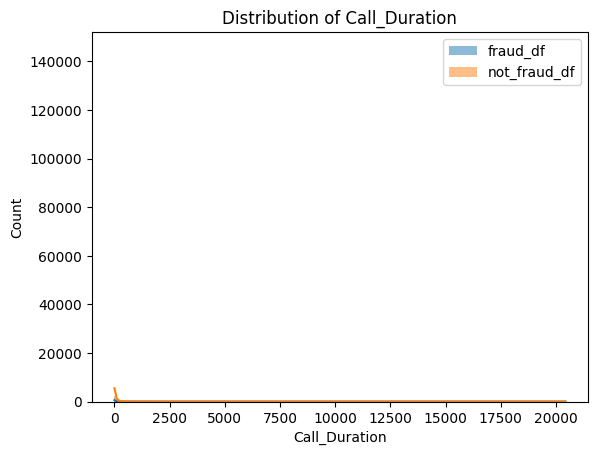

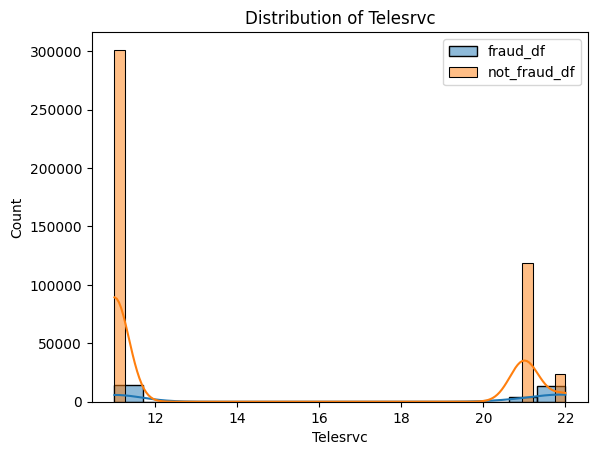

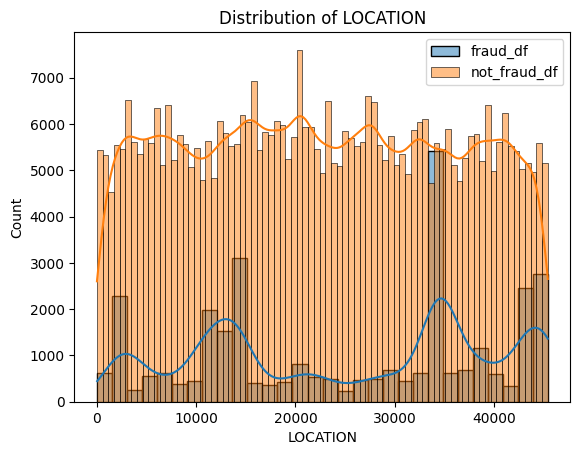

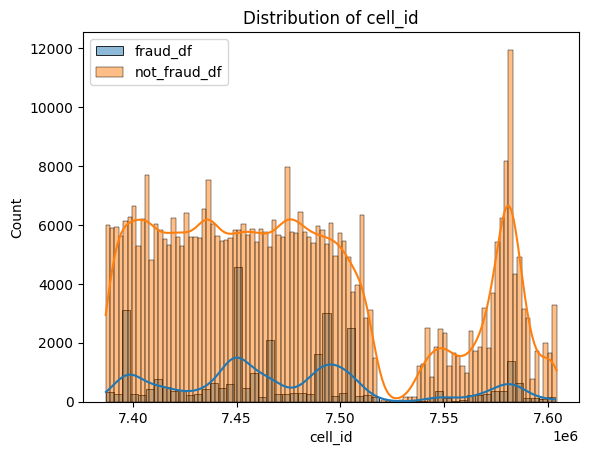

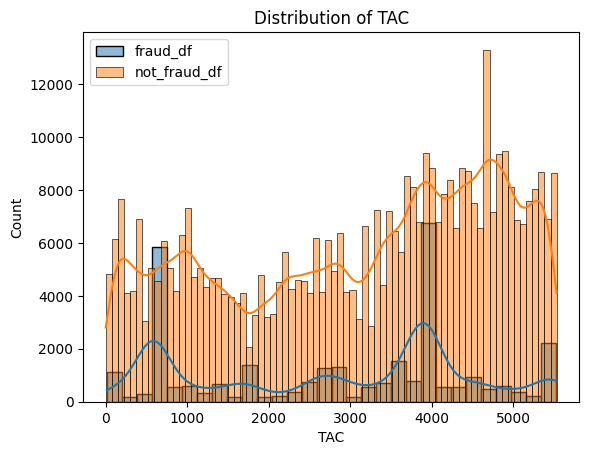

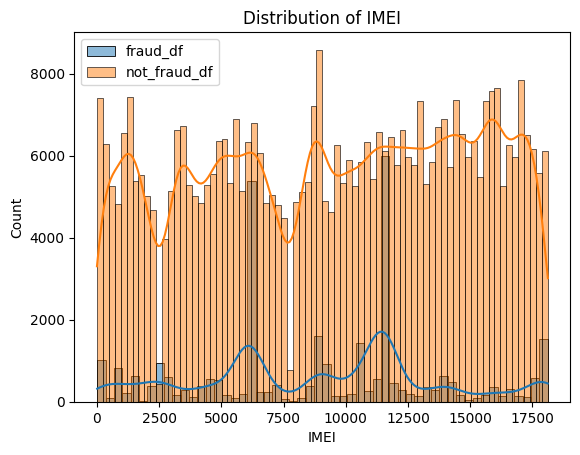

In [15]:
# Iterating over selected columns for comparison
for col in ["Charging_Tm", "Call_Type", "Call_Duration", "Telesrvc", "LOCATION", "cell_id", "TAC", "IMEI"]:
    # Creating a new figure for each column
    plt.figure()
    
    # Plotting histogram for 'col' in fraud_df with fill and kernel density estimate
    sns.histplot(fraud_df[col], label='fraud_df', fill=True, kde=True)

    # Plotting histogram for 'col' in not_fraud_df with fill and kernel density estimate
    sns.histplot(not_fraud_df[col], label='not_fraud_df', fill=True, kde=True)

    # Setting title for the plot
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


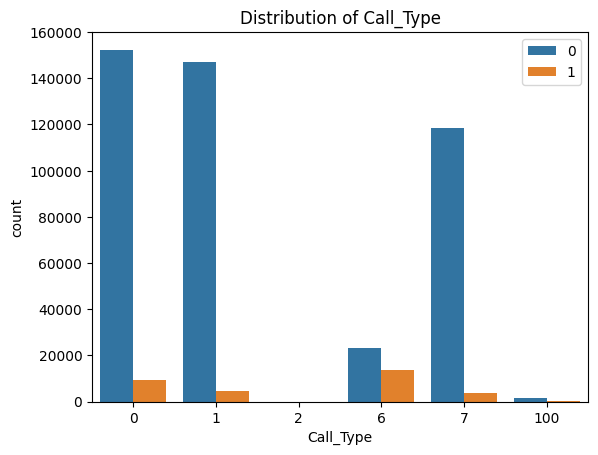

c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\tr3h2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


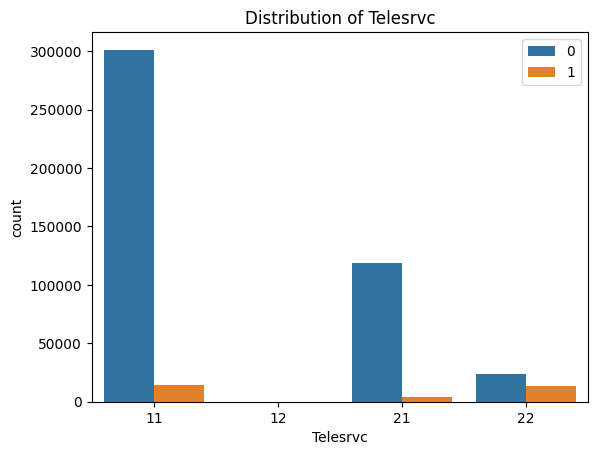

In [16]:
# Iterating over selected columns for comparison
for col in ["Call_Type", "Telesrvc"]:
    # Creating a new figure for each column
    plt.figure()

    # Creating a count plot for 'col' in df with hue set to "is_fraud" to distinguish fraudulent and non-fraudulent transactions
    sns.countplot(data=df, x=col, hue="is_fraud")
    
    # Setting title for the plot
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


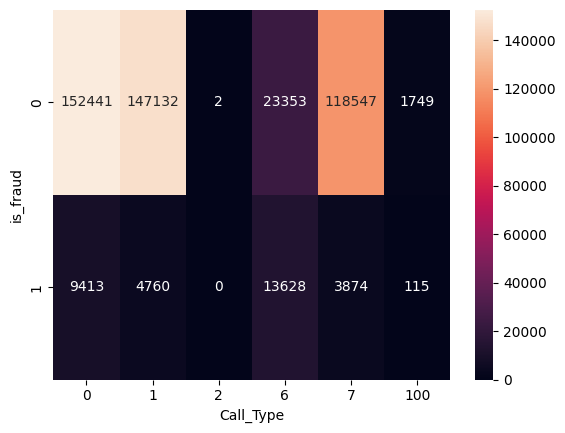

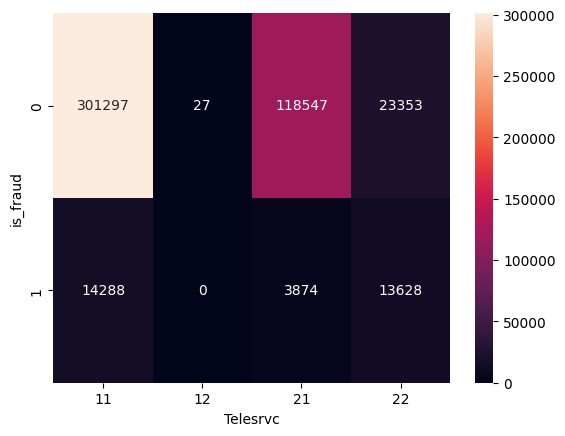

In [17]:
# Iterating over selected columns for comparison
for col in ["Call_Type", "Telesrvc"]:
    # Creating a new figure for each column
    plt.figure()

    # Creating a heatmap using pd.crosstab to visualize the relationship between 'is_fraud' and 'col'
    # annot=True adds numeric values to the heatmap cells, fmt='d' formats the values as integers
    sns.heatmap(pd.crosstab(df['is_fraud'], df[col]), annot=True, fmt='d')
